/Users/d057269/Library/Python/3.8/lib/python/site-packages/pm4py/visualization/petrinet/__init__.py:20: UserWarning: please use the pm4py.visualization.petri_net package instead
  warnings.warn("please use the pm4py.visualization.petri_net package instead")
replaying log with TBR, completed variants :: 100%|██████████| 35/35 [00:00<00:00, 1593.39it/s]


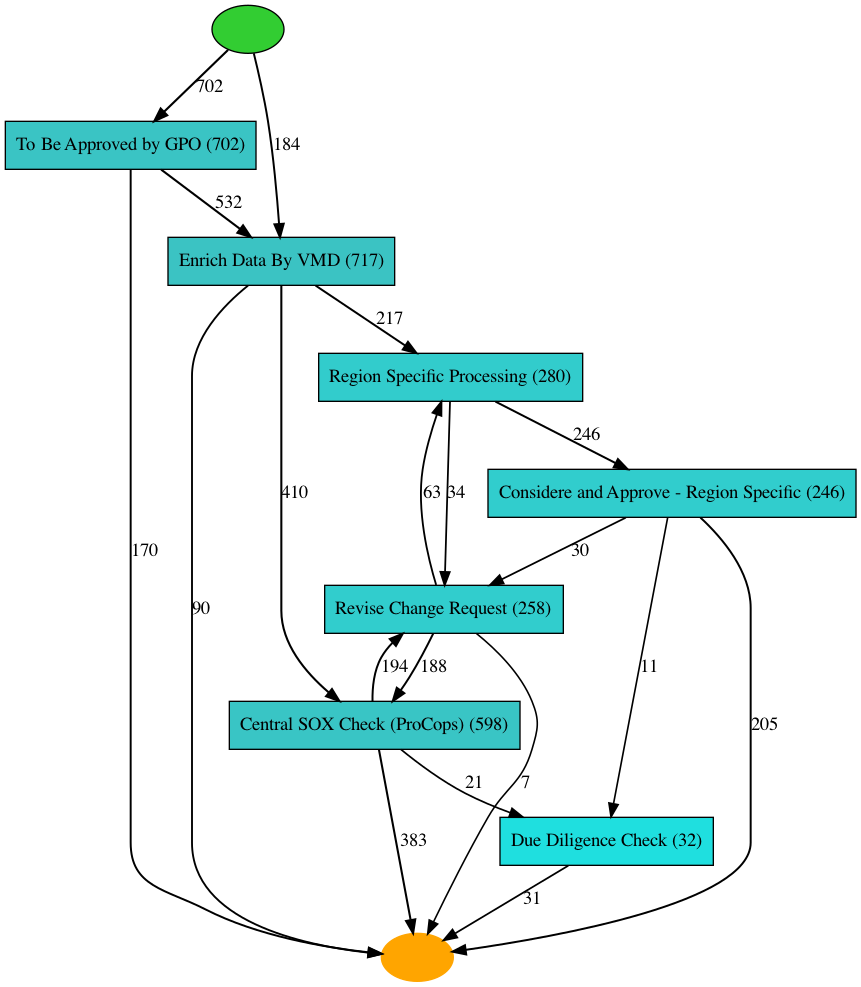

To Be Approved by GPO >> Enrich Data By VMD
Change Request ID 271119
 To Be Approved by GPO 2021-01-02 09:23:46+00:00
 Enrich Data By VMD 2021-01-08 07:25:25+00:00
Change Request ID 271261
 To Be Approved by GPO 2021-01-04 14:31:03+00:00
 Enrich Data By VMD 2021-01-05 11:03:33+00:00
Change Request ID 271443
 To Be Approved by GPO 2021-01-05 09:35:44+00:00
 Enrich Data By VMD 2021-01-11 12:51:54+00:00
Change Request ID 271533
 To Be Approved by GPO 2021-01-05 19:35:18+00:00
 Enrich Data By VMD 2021-01-18 09:50:36+00:00
Change Request ID 271767
 To Be Approved by GPO 2021-01-07 08:46:24+00:00
 Enrich Data By VMD 2021-01-07 09:20:52+00:00
Change Request ID 271790
 To Be Approved by GPO 2021-01-07 10:07:12+00:00
 Enrich Data By VMD 2021-01-07 12:16:30+00:00
Change Request ID 272243
 To Be Approved by GPO 2021-01-11 13:24:17+00:00
 Enrich Data By VMD 2021-01-12 03:02:52+00:00
Change Request ID 272267
 To Be Approved by GPO 2021-01-11 14:16:23+00:00
 Enrich Data By VMD 2021-01-25 11:03:11+00

In [1]:
import pm4py

from datetime import datetime

import pandas as pd

from pm4py.objects.conversion.log import converter as log_converter

from pm4py.objects.log.exporter.xes import exporter as xes_exporter

from pm4py.objects.log.importer.xes import importer as xes_importer

from pm4py.objects.log.util import dataframe_utils

# process mining 
from pm4py.algo.discovery.alpha import algorithm as alpha_miner

from pm4py.algo.discovery.inductive import algorithm as inductive_miner

from pm4py.algo.discovery.heuristics import algorithm as heuristics_miner

from pm4py.algo.discovery.dfg import algorithm as dfg_discovery

# viz
from pm4py.visualization.petrinet import visualizer as pn_visualizer

from pm4py.visualization.petri_net import visualizer as new_pn_viz

from pm4py.visualization.process_tree import visualizer as pt_visualizer

from pm4py.visualization.heuristics_net import visualizer as hn_visualizer

from pm4py.visualization.dfg import visualizer as dfg_visualization

from pm4py.visualization.bpmn import visualizer as bpmn_viz

# misc 
from pm4py.objects.conversion.process_tree import converter as pt_converter

# filter
from pm4py.algo.filtering.log.variants import variants_filter

# xes 
#log = xes_importer.apply('running-example.xes')

# csv
df = pd.read_csv('MDGS_Extract_Log.csv', sep = ';')

#df = pd.to_datetime(df["Created On"][1], dayfirst = True)

df["time:timestamp"] = df["Created On"] + ' ' + df["Creation Time"]
del df["Created On"]
del df["Creation Time"]

df = dataframe_utils.convert_timestamp_columns_in_df(df)
df = df.sort_values(["case:concept:name", "time:timestamp"])


#print(df)

# create log
log = log_converter.apply(df)
xes_exporter.apply(log, "MDGS_Formated_Log.xes")

# alpha miner
net, initial_marking, final_marking = alpha_miner.apply(log)

# viz
parameters = {pn_visualizer.Variants.FREQUENCY.value.Parameters.FORMAT: "png"}
gviz = new_pn_viz.apply(net, initial_marking, final_marking, 
                          parameters=parameters, 
                           variant=pn_visualizer.Variants.FREQUENCY, 
                           log=log)


#gviz = new_pn_viz.apply(net, initial_marking, final_marking)
#pn_visualizer.view(gviz)


# heuristics miner
heu_net = heuristics_miner.apply_heu(log)

# viz
gviz = hn_visualizer.apply(heu_net)
hn_visualizer.view(gviz)

######################################
#show varaints
######################################

variants = variants_filter.get_variants(log)

process_variant = ''
idx = 1
count_wf_step = 0.

for variant_key, list_of_change_request in variants.items(): #variant_key = process flow / pattern as string, list_of_change_request = list of traces (change request)

    list_wf_step = variant_key.split(",") #split the workflow in steps
    count_wf_step = len(list_wf_step)

    #print process/workflow
    for wf_step in list_wf_step:
        if idx < count_wf_step:
            process_variant = process_variant + wf_step + ' >> '
        else:
           process_variant = process_variant + wf_step
        idx = idx + 1 
    print(process_variant)
    
    # re-initiation
    process_variant = ''
    idx = 1
    count_wf_step = 0

    #process each chagne request...
    activity = ''
    for change_request in list_of_change_request:
        change_request_id = change_request.attributes.get("concept:name")
        print("Change Request ID "  + str(change_request_id))
        for wf_step in change_request:
            for wf_step_attr, wf_step_val in wf_step.items():
                if wf_step_attr != 'concept:name':
                    if wf_step_attr != 'time:timestamp':
                        activity = activity + ' ' + wf_step_val
                    else:
                        activity = activity + ' ' + str(wf_step_val)
            print(activity)
            activity = ''
                
            
        
            
           
      
        

        
